In [1]:
!pip install "dask[complete]"

In [2]:
#Starting DASK client cluster
from dask.distributed import Client
client = Client(n_workers=4)

### Calling Function

In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

Wall time: 3.04 s


In [5]:
import dask

In [6]:
%%time
x=dask.delayed(inc)(1)
y=dask.delayed(inc)(2)
z=dask.delayed(add)(x,y)

Wall time: 1 ms


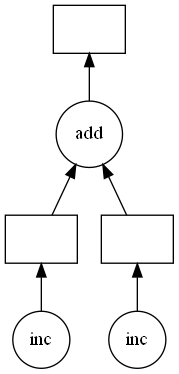

In [7]:
z.visualize()

In [8]:
%%time
z.compute()

Wall time: 2.04 s


5

### Parallelize For - Loop

In [9]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

Wall time: 8.07 s


In [11]:
total

44

In [20]:
results=[]
for x in data:
    y=dask.delayed(inc)(x)
    results.append(y)
    
total=dask.delayed(sum)(results)

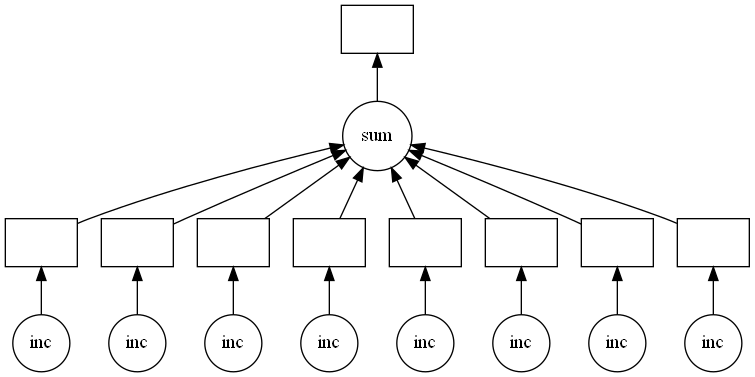

In [21]:
total.visualize()

In [19]:
%%time
total.compute()

Wall time: 2.05 s


44

### Sum calculation row-wise

In [22]:
import numpy as np 

In [50]:
arr=np.random.randint(1,3,(10**4,10))
arr

array([[2, 1, 1, ..., 2, 1, 2],
       [2, 1, 2, ..., 1, 2, 2],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 1, 1],
       [1, 2, 2, ..., 2, 2, 2],
       [1, 1, 2, ..., 2, 2, 1]])

In [51]:
n=np.mean(arr,axis=0)

In [52]:
n

array([1.5049, 1.4991, 1.5008, 1.4908, 1.4971, 1.5017, 1.5042, 1.499 ,
       1.5068, 1.5026])

In [54]:
import time 
start=time.time()
result=arr-n
end=time.time()
end-start

0.0010013580322265625

In [58]:
result=np.zeros((10**4,10))

import time 
start=time.time()
for row in range(10**4):
    result[row]=arr[row]-n
end=time.time()
end-start

0.02801823616027832

In [63]:
def sub(x,y):
    sleep(1)
    return x-y

import dask.array as da

dask_arr=da.random.randint(1,3,(10**5,10))
n=dask_arr.mean(axis=0)

result=dask_arr-n

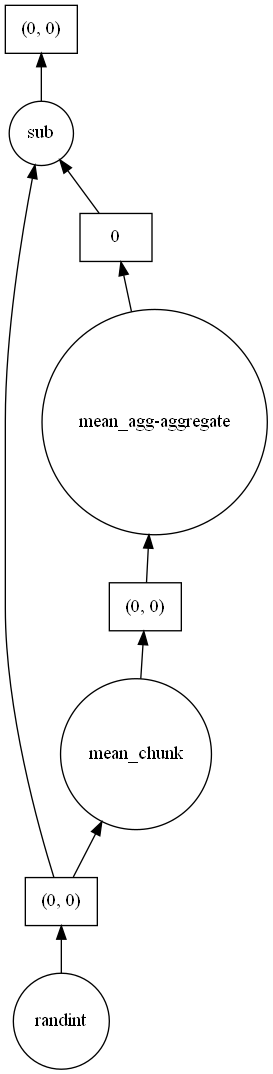

In [64]:
result.visualize()

In [65]:
%%time 
result.compute()

Wall time: 859 ms


array([[ 0.50255, -0.49902,  0.49775, ...,  0.49889,  0.49938,  0.50073],
       [ 0.50255, -0.49902, -0.50225, ...,  0.49889,  0.49938, -0.49927],
       [ 0.50255,  0.50098,  0.49775, ...,  0.49889, -0.50062,  0.50073],
       ...,
       [ 0.50255, -0.49902, -0.50225, ..., -0.50111, -0.50062, -0.49927],
       [-0.49745, -0.49902, -0.50225, ...,  0.49889, -0.50062, -0.49927],
       [ 0.50255,  0.50098,  0.49775, ..., -0.50111,  0.49938, -0.49927]])